In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import yfinance as yf

In [15]:
stock_list = {
    'VUKE.L': 'FTSE 100',
    'VMID.L': 'FTSE 250',
    'VUSA.L': 'S&P 500',
    'VERX.L': 'DEVELOPED EUROPE EX UK',
    'VEUR.L': 'DEVELOPED EUROPE',
    'VGER.L': 'GERMANY ALL CAP',
    #'V3AM.L': 'ESG GLOBAL ALL CAP',
    'VWRL.L': 'FTSE ALL WORLD',
    'VHYL.L': 'WORLD HIGH DIVIDEND YIELD',
    'VEVE.L': 'DEVELOPED WORLD',
    'VJPN.L': 'FTSE JAPAN',
    #'VAPX.L': 'ASIA EX JAPAN',
    'VNRT.L': 'FTSE NORTH AMERICA',
    'VFEM.L': 'EMERGING MARKETS'
}
#stock_list = ['VUKE.L', 'VMID.L', 'VUSA.L', 'VERX.L', 'VEUR.L', 'VGER.L', 'V3AM.L', 'VWRL.L', 'VEVE.L', 'VJPN.L','VAPX.L', 'VNRT.L', 'VFEM.L']
fixed_income = ['VECP.L', 'VETY.L', 'VAGP.L', 'VGOV.L', 'VUCP.L', 'VUTY.L', 'VEMT.L']

stocks = yf.Tickers(list(stock_list.keys()))
stock_prices = stocks.history('5y')['Close']
#stock_prices.dropna(inplace=True)
#vuke = vuke.history('5y')

[*********************100%***********************]  12 of 12 completed


In [14]:
stock_prices

,VERX.L,VEUR.L,VEVE.L,VFEM.L,VGER.L,VHYL.L,VJPN.L,VMID.L,VNRT.L,VUKE.L,VUSA.L,VWRL.L
Date,,,,,,,,,,,,
2016-05-31,19.924999,21.365000,NaN,NaN,NaN,NaN,17.070000,27.955000,NaN,28.027500,27.450001,46.044998
2016-06-01,20.102501,21.395000,NaN,NaN,NaN,NaN,17.170000,27.740000,NaN,27.850000,27.700001,46.384998
2016-06-02,20.077499,21.400000,NaN,NaN,NaN,NaN,16.990000,27.775000,NaN,27.840000,27.660000,46.349998
2016-06-03,20.065001,NaN,NaN,NaN,NaN,NaN,16.930000,27.754999,NaN,27.947500,27.430000,46.174999
2016-06-06,20.275000,21.642500,NaN,NaN,NaN,NaN,17.240000,27.980000,NaN,28.290001,27.780001,46.820000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.404999,NaN,31.264999,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.267502,NaN,31.180000,NaN,NaN
2021-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.514999,NaN,31.165001,NaN,NaN


In [116]:
n_days = 4000
n_stocks = 2000

In [117]:
# Simulate daily returns for all stocks over the course of our observation period.


mu = 0.001
sigma = 0.1

np.random.seed(0)
returns = returns = np.random.normal(mu, sigma, (n_stocks, n_days))
print(f'returns.shape={returns.shape}')

market_caps = np.random.uniform(10000,1000000, n_stocks)


returns.shape=(2000, 4000)


In [118]:
# Calculate the market portfolio return series.

cumulative_return = np.array([np.cumsum(1+returns[i]) for i in range(n_stocks)])

# market portfolio returns
market_cap_series = np.array([cumulative_return[i]*market_caps[i] for i in range(n_stocks)])

print(f'market_cap_series.shape={market_cap_series.shape}')

weights = np.array([market_cap_series[i]/sum(market_cap_series[i]) for i in range(n_stocks)])

print(f'weights.shape={weights.shape}')

weights_returns = weights*returns

print(f'weights_returns.shape={weights_returns.shape}')

market_return = np.array([sum(weights_returns[j][i] for j in range(n_stocks)) for i in range(n_days)])

print(f'market_return.shape={market_return.shape}')


market_cap_series.shape=(2000, 4000)
weights.shape=(2000, 4000)
weights_returns.shape=(2000, 4000)
market_return.shape=(4000,)


In [119]:
# conduct CAPM analysis for each stock and record the beta.

from sklearn.linear_model import LinearRegression

betas = []

for i in range(n_stocks):
    regressinoModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
    y = returns[:][i]
    x = market_return.reshape(-1,1)
    regressinoModel.fit(x,y)
    # intercept, beta, index 
    betas.append((regressinoModel.intercept_,regressinoModel.coef_[0], i))



In [120]:
# Sort the betas
betas.sort(key=lambda it: it[1])


# split into low and high sets of beta
lowBeta = betas[0:int(n_stocks/2)-1]
highBeta = betas[int(n_stocks/2):n_stocks-1]

# subset the returns matrix into high and low beta stocks.
lowBetaReturns = np.array([returns[j[2]] for j in lowBeta])
highBetaReturns = np.array([returns[j[2]] for j in highBeta])
print(lowBetaReturns.shape)

# equally weight each asset and compute the portfolio returns
lowReturns = np.array([sum(1/1000*lowBetaReturns[...,i]) for i in range(n_days)])
highReturns = np.array([sum(1/1000*highBetaReturns[...,i]) for i in range(n_days)])


(999, 4000)


In [121]:
# Calculate the H and L portfolio betas

lowRetModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
lowRetModel.fit(y=lowReturns, X=market_return.reshape(-1,1))

highRetModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
highRetModel.fit(y=highReturns, X=market_return.reshape(-1,1))


# show that they are equal to the average beta in the simple case.
print(f'=== Simple average ===')
print(f'Average low beta {sum([stat[1] for stat in lowBeta])/1000}')
print(f'Average high beta {sum([stat[1] for stat in highBeta])/1000}')
print(f'=== CAPM ===')
print(f'LowBeta: {lowRetModel.coef_}, Alpha: {lowRetModel.intercept_}')
print(f'HighBeta: {highRetModel.coef_}, Alpha: {highRetModel.intercept_}')

lowBetaVal = lowRetModel.coef_[0]
highBetaVal = highRetModel.coef_[0]

scalarLow = 1/lowBetaVal
scalarHigh = 1/highBetaVal
print('')

print(f'For every dollar invested in lowBeta, we will leverage by {scalarLow}')
print(f'For every dollar in highBeta, we will delveraged by, {scalarHigh}')

bab_portfolio = (scalarLow * lowReturns) - (scalarHigh * highReturns)


=== Simple average ===
Average low beta 0.47719899771339097
Average high beta 2.352618635317163
=== CAPM ===
LowBeta: [0.477199], Alpha: 0.0007966835240032775
HighBeta: [2.35261864], Alpha: -0.00023124997014601864

For every dollar invested in lowBeta, we will leverage by 2.095561819684724
For every dollar in highBeta, we will delveraged by, 0.4250582669830744


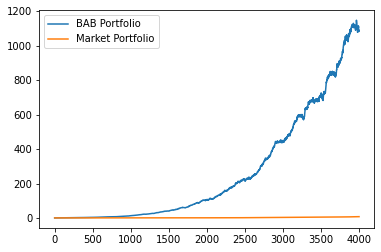

In [122]:
plt.plot(np.cumprod(1+bab_portfolio), label='BAB Portfolio')
plt.plot(np.cumprod(1+market_return), label='Market Portfolio')
plt.legend()

In [124]:
regressionModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=3)
regressionModel.fit(y=bab_portfolio, X=market_return.reshape(-1,1))

print(f'Beta coefficient: {regressionModel.coef_[0]} ~= 0')
print(f'Intercept (Alpha): {regressionModel.intercept_}')

Beta coefficient: 5.830234509233627e-16 ~= 0
Intercept (Alpha): 0.0017677942868233013
